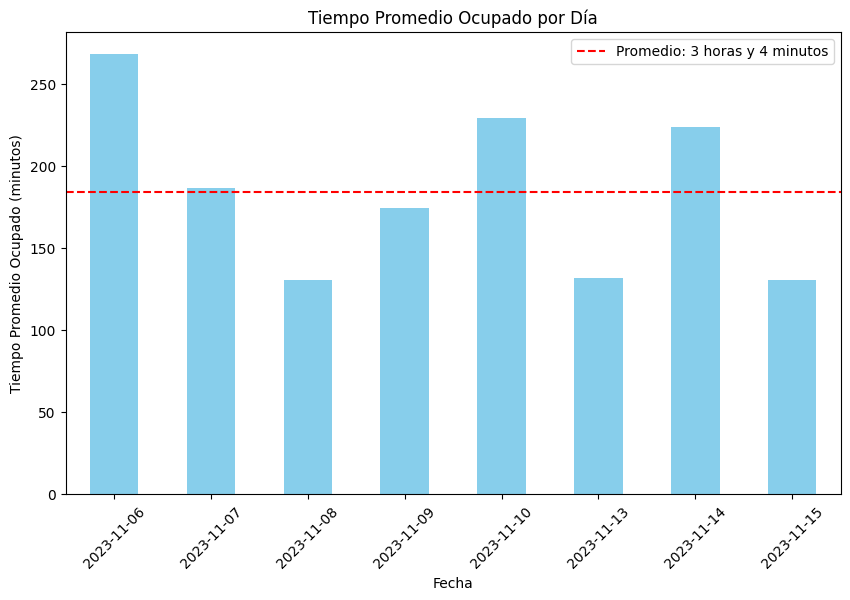

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('attendance.csv')

# Convertir las columnas de fechas a objetos datetime
df['Entry_date'] = pd.to_datetime(df['Entry_date'], format='%d-%m-%y %H:%M')
df['Exit_date'] = pd.to_datetime(df['Exit_date'], format='%d-%m-%y %H:%M')

# Calcular la duración de cada entrada en el laboratorio
df['Duration'] = df['Exit_date'] - df['Entry_date']

# Extraer el día de la semana y la fecha
df['Day_of_week'] = df['Entry_date'].dt.day_name()
df['Date'] = df['Entry_date'].dt.date

# Calcular el tiempo total ocupado por día en minutos
daily_total_time = df.groupby('Date')['Duration'].sum().dt.total_seconds() / 60

# Calcular el número de entradas por día
daily_entries = df.groupby('Date').size()

# Calcular el tiempo promedio ocupado por día en minutos
daily_average_time = daily_total_time / daily_entries

# Calcular el valor promedio en minutos
overall_average = daily_average_time.mean()

# Separar valores de hora y minutos
average_duration_hours = math.trunc(overall_average // 60)
average_duration_minutes = math.trunc(overall_average % 60)

# Graficar el tiempo promedio ocupado por día
plt.figure(figsize=(10, 6))
daily_average_time.plot(kind='bar', color='skyblue')
plt.axhline(y=overall_average, color='red', linestyle='--', label=f'Promedio: {average_duration_hours} horas y {average_duration_minutes} minutos')
plt.title('Tiempo Promedio Ocupado por Día')
plt.xlabel('Fecha')
plt.ylabel('Tiempo Promedio Ocupado (minutos)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

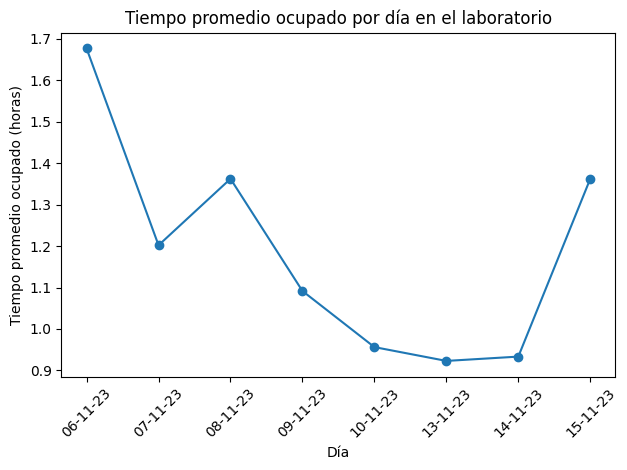

In [15]:
import csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
data = []
with open('attendance.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Función para convertir las fechas y calcular el tiempo ocupado
def convert_dates_and_calculate_occupied_time(entry_date, exit_date):
    entry_time = datetime.strptime(entry_date, "%d-%m-%y %H:%M")
    exit_time = datetime.strptime(exit_date, "%d-%m-%y %H:%M")
    return entry_time, exit_time

# Horario de apertura y cierre del laboratorio
opening_time = datetime.strptime("08:30", "%H:%M")
closing_time = datetime.strptime("18:30", "%H:%M")

# Inicializar diccionario para almacenar el tiempo ocupado por día
occupied_time_per_day = {}

# Calcular el tiempo ocupado por día
for entry in data:
    entry_date, exit_date = convert_dates_and_calculate_occupied_time(entry['Entry_date'], entry['Exit_date'])

    # Verificar si la entrada y salida están dentro del horario de laboratorio
    if entry_date.time() >= opening_time.time() and exit_date.time() <= closing_time.time():
        day = entry_date.strftime("%d-%m-%y")
        if day not in occupied_time_per_day:
            occupied_time_per_day[day] = timedelta()
        occupied_time_per_day[day] += exit_date - entry_date

# Calcular el tiempo promedio ocupado por día
average_occupied_time_per_day = {day: occupied_time / len(occupied_time_per_day) for day, occupied_time in occupied_time_per_day.items()}

# Crear gráfico
days = list(average_occupied_time_per_day.keys())
average_occupied_time = [abs(time.total_seconds() / 3600) for time in average_occupied_time_per_day.values()]

plt.plot(days, average_occupied_time, marker='o')
plt.xlabel('Día')
plt.ylabel('Tiempo promedio ocupado (horas)')
plt.title('Tiempo promedio ocupado por día en el laboratorio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


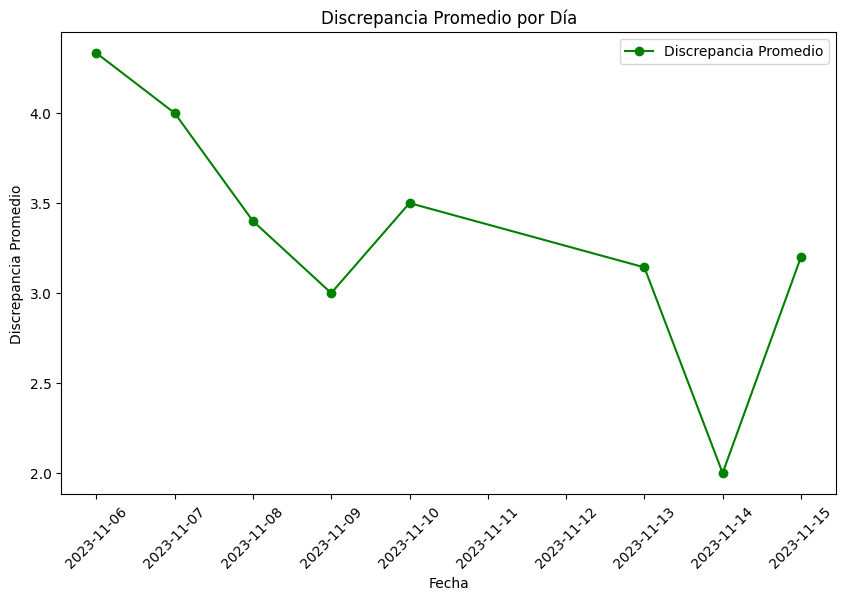

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('attendance.csv')

# Convertir las columnas de fechas a objetos datetime
df['Entry_date'] = pd.to_datetime(df['Entry_date'], format='%d-%m-%y %H:%M')
df['Exit_date'] = pd.to_datetime(df['Exit_date'], format='%d-%m-%y %H:%M')

# Agregar columnas de discrepancias aleatorias entre 0 y 6
np.random.seed(42)  # Setting seed for reproducibility
df['Discrepancy'] = np.random.randint(0, 7, size=len(df))

# Extraer la fecha
df['Date'] = df['Entry_date'].dt.date

# Calcular la discrepancia promedio por día
daily_average_discrepancy = df.groupby('Date')['Discrepancy'].mean()

# Graficar la discrepancia promedio por día
plt.figure(figsize=(10, 6))
plt.plot(daily_average_discrepancy.index, daily_average_discrepancy, marker='o', color='green', label='Discrepancia Promedio')
plt.title('Discrepancia Promedio por Día')
plt.xlabel('Fecha')
plt.ylabel('Discrepancia Promedio')
plt.xticks(rotation=45)
plt.legend()
plt.show()
